#1 Lets Invite Some Libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

#2 Reviewing Our Dataset/ Exploratory Data Analysis

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

#3 Going deeper into Rewiew and Likes.

In [ ]:
# Calculate the length of the 'Review' column and store it in a new column 'review_length'
df['review_length'] = df['Review'].apply(len)

# Now you can filter based on the 'review_length' column
filtered_df = df[df['review_length'] == 100]

# Access the first matching row (if it exists)
if not filtered_df.empty:
    first_matching_row = filtered_df.iloc[0]
    print(first_matching_row)
else:
    print("No matching rows found.")


Review           Perhaps I caught them on an off night judging by the other reviews, but I'm not inspired to go back.
Liked                                                                                                               0
review_length                                                                                                     100
Name: 175, dtype: object


In [ ]:
koc=df[df['Liked']==0]
print(koc)

                                                                                                                                     Review  \
1                                                                                                                        Crust is not good.   
2                                                                                                 Not tasty and the texture was just nasty.   
5                                                                                            Now I am getting angry and I want my damn pho.   
6                                                                                                     Honeslty it didn't taste THAT fresh.)   
7                           The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.   
..                                                                                                                                      ...   

#4 Looking For Null Values

In [ ]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]


In [ ]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)

# Check the content of missing_values DataFrame
print(missing_values.head())  # Print the first few rows to check the data

# Verify the data types of 'percent' column
print(missing_values['percent'].dtype)  # Check the data type

# Plot the data only if the DataFrame is not empty
if not missing_values.empty:
    splot = sns.barplot(x='column', y='percent', data=missing_values)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                       va='center', xytext=(0, 9), textcoords='offset points')
    plt.xlabel("Column_Name", size=14, weight="bold")
    plt.ylabel("Percentage", size=14, weight="bold")
    plt.title("Percentage of missing values in column", fontweight="bold", size=17)
    plt.show()
else:
    print("The missing_values DataFrame is empty.")



Empty DataFrame
Columns: [column, percent]
Index: []
float64
The missing_values DataFrame is empty.


<Figure size 1500x500 with 0 Axes>

# 5 Unique Values In Each Feature Coulmn

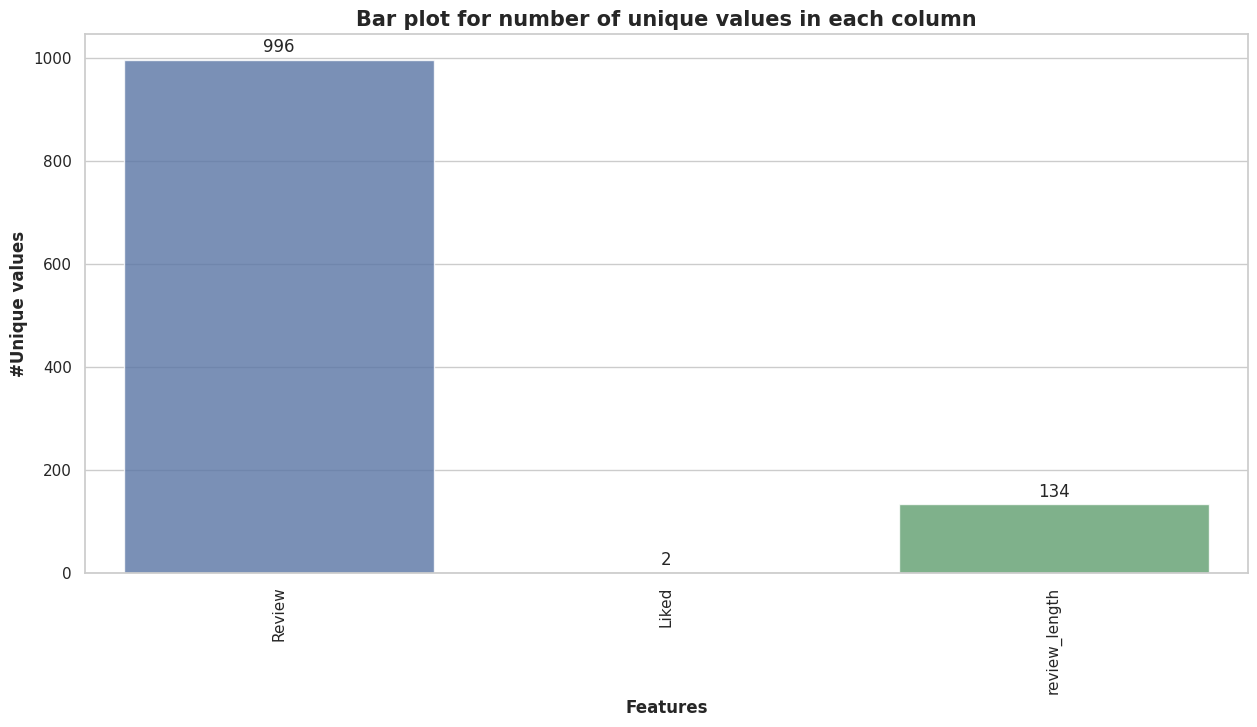

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
loc_analysis = pd.DataFrame(df['Liked'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Liked':'count'})


In [ ]:
import plotly.graph_objects as go

In [ ]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Liked ",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

#6 Data Preprocessing

In [ ]:
# write function for removing unwanted puncaations
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# remove special characters, numbers, punctuations
df['Review'] = df['Review'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
df.head(5)

,Review,Liked,review_length
0,Wow Loved this place,1,24
1,Crust is not good,0,18
2,Not tasty and the texture was just nasty,0,41
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it,1,87
4,The selection on the menu was great and so were the prices,1,59


In [ ]:
# remove short words
df['Review'] = df['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
df.head(4)

,Review,Liked,review_length
0,Wow Loved this place,1,24
1,Crust not good,0,18
2,Not tasty and the texture was just nasty,0,41
3,Stopped during the late May bank holiday off Rick Steve recommendation and loved,1,87


#7 Story Generation and Visualization from Review

In [ ]:
df.head(2)

,Review,Liked,review_length
0,Wow Loved this place,1,24
1,Crust not good,0,18


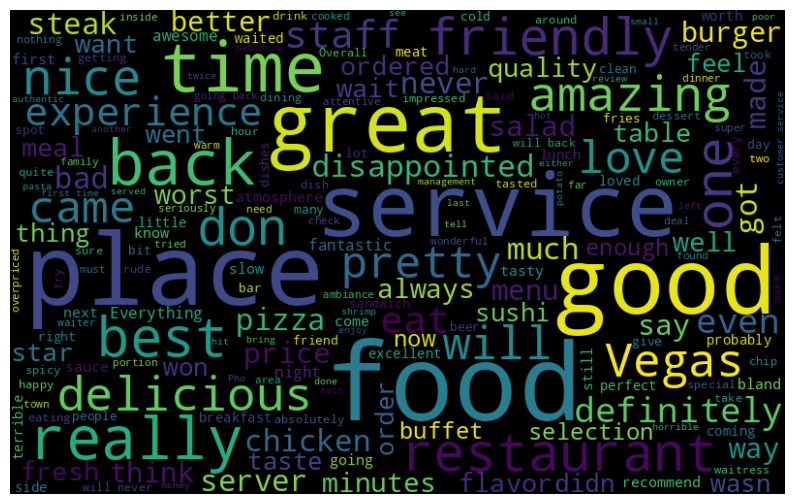

In [ ]:
# Create text from all tweets
all_words = ' '.join([text for text in df['Review']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


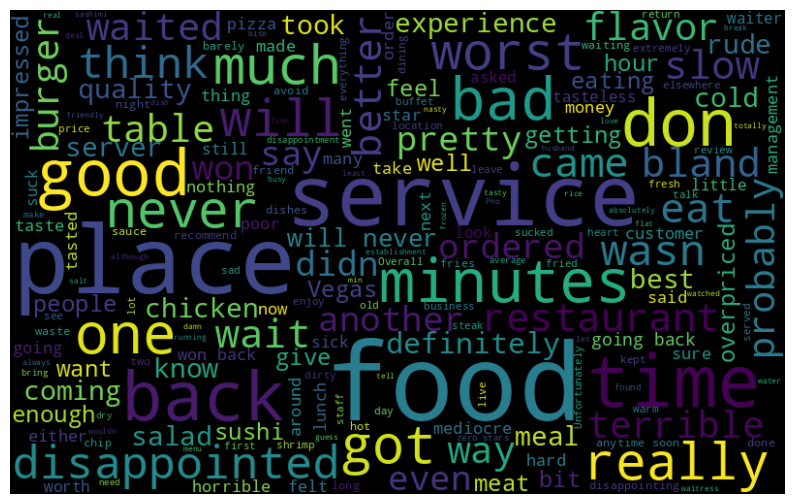

In [ ]:
# create text from just normal Review
normal_words = ' '.join([text for text in df['Review'][df['Liked'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 8 Understanding the impact of Hashtags on Review sentiment

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags
HT_p = hashtag_extract(df['Review'][df['Liked'] == 0])
HT_n = hashtag_extract(df['Review'][df['Liked'] == 1])



# unnesting list
HT_0 = sum(HT_p, [])
HT_1 = sum(HT_n, [])

In [ ]:
print(HT_p)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [ ]:
print(HT_n)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
df['Review'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                      [W, w,  , L, v, e,  , h,  , p, l, c, e]
1                                                                                                                                                                                        [C, r, u,  , n,  , g]
2                                                                                                                                                 [N,  ,  , n,  , h, e,  , e, x, u, r, e,  , w,  , j, u,  , n]
3                                                          [S, p, p, e,  , u, r, n, g,  , h, e,  , l, e,  , M,  , b, n, k,  , h, l,  , f, f,  , R, c, k,  , S, e, v, e,  , r, e, c, e, n, n,  , n,  , l, v, e]
4                                                                                              [T, h, e,  , e, l, e, c, n,  , h, e,  , e, n, u,  , w,  , g, r, e,  , n,  , w

In [ ]:
df.shape

(1000, 3)

In [ ]:
df.isnull().sum()

Review           0
Liked            0
review_length    0
dtype: int64

In [ ]:
from sklearn. feature_extraction. text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
[punc for punc in string. punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Liked'], random_state=107, test_size=0.2)

In [ ]:
new_df = df[['Review','Liked']]

In [ ]:
new_df.head()

,Review,Liked
0,Wow Loved this place,1
1,Crust not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped during the late May bank holiday off Rick Steve recommendation and loved,1
4,The selection the menu was great and were the prices,1


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['Review'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                      [W, w,  , L, v, e,  , h,  , p, l, c, e]
1                                                                                                                                                                                        [C, r, u,  , n,  , g]
2                                                                                                                                                 [N,  ,  , n,  , h, e,  , e, x, u, r, e,  , w,  , j, u,  , n]
3                                                          [S, p, p, e,  , u, r, n, g,  , h, e,  , l, e,  , M,  , b, n, k,  , h, l,  , f, f,  , R, c, k,  , S, e, v, e,  , r, e, c, e, n, n,  , n,  , l, v, e]
4                                                                                              [T, h, e,  , e, l, e, c, n,  , h, e,  , e, n, u,  , w,  , g, r, e,  , n,  , w

In [ ]:
new_df.shape

(1000, 2)

In [ ]:
new_df.isnull().sum()


Review    0
Liked     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Liked.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (800, 2)
valid shape :  (200, 2)


# 9 Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Review.values)
X_valid = vectorizer.transform(valid.Review.values)

y_train = train.Liked.values
y_valid = valid.Liked.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (800, 1620)
X_train.shape :  (200, 1620)
y_train.shape :  (800,)
y_valid.shape :  (200,)


#10 Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

training accuracy Score    :  0.95125
Validation accuracy Score :  0.82
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        96
           1       0.84      0.81      0.82       104

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

accuracy score for alpha-0.0 is : 80.0%


# 11 Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

Training accuracy Score    :  0.9975
Validation accuracy Score :  0.8
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       104
           1       0.78      0.81      0.80        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

accuracy score for alpha-0.0 is : 80.0%


#12 RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have already split your data into train and validation sets (X_train, X_valid, y_train, y_valid)

# Define and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the validation set
rf_prediction = rf_clf.predict(X_valid)

# Calculate accuracy
rf_accuracy = accuracy_score(y_valid, rf_prediction)

# Print training and validation accuracy
print("Training accuracy Score    : ", rf_clf.score(X_train, y_train))
print("Validation accuracy Score : ", rf_accuracy)

# Print classification report
print(classification_report(rf_prediction, y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

Training accuracy Score    :  0.99875
Validation accuracy Score :  0.76
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       122
           1       0.65      0.83      0.73        78

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.78      0.76      0.76       200

accuracy score for alpha-0.0 is : 80.0%


#13 Extreme Gradient Boosting ( For Multiclass Classification)


In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

Training accuracy Score    :  0.82875
Validation accuracy Score :  0.755
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       119
           1       0.66      0.81      0.73        81

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.76      0.76       200

accuracy score for alpha-0.0 is : 80.0%


# 14 Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

Training accuracy Score    :  0.96625
Validation accuracy Score :  0.785
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       125
           1       0.66      0.88      0.75        75

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.78       200
weighted avg       0.82      0.79      0.79       200

accuracy score for alpha-0.0 is : 80.0%


# 15 Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

Training accuracy Score    :  0.965
Validation accuracy Score :  0.8
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       110
           1       0.75      0.83      0.79        90

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

accuracy score for alpha-0.0 is : 80.0%


# 16 CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.9825
Validation accuracy Score :  0.79
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       116
           1       0.71      0.85      0.77        84

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



# 17 All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
3,Naive Bayes,0.820
1,Logistic Regression,0.800
4,Stochastic Gradient Decent,0.800
6,CatBoost,0.790
0,Support Vector Machines,0.785
2,Random Forest,0.760
5,XGBoost,0.755


# 18 Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9975
Validation accuracy Score :  0.8
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       104
           1       0.78      0.81      0.80        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[398   2]
 [  0 400]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

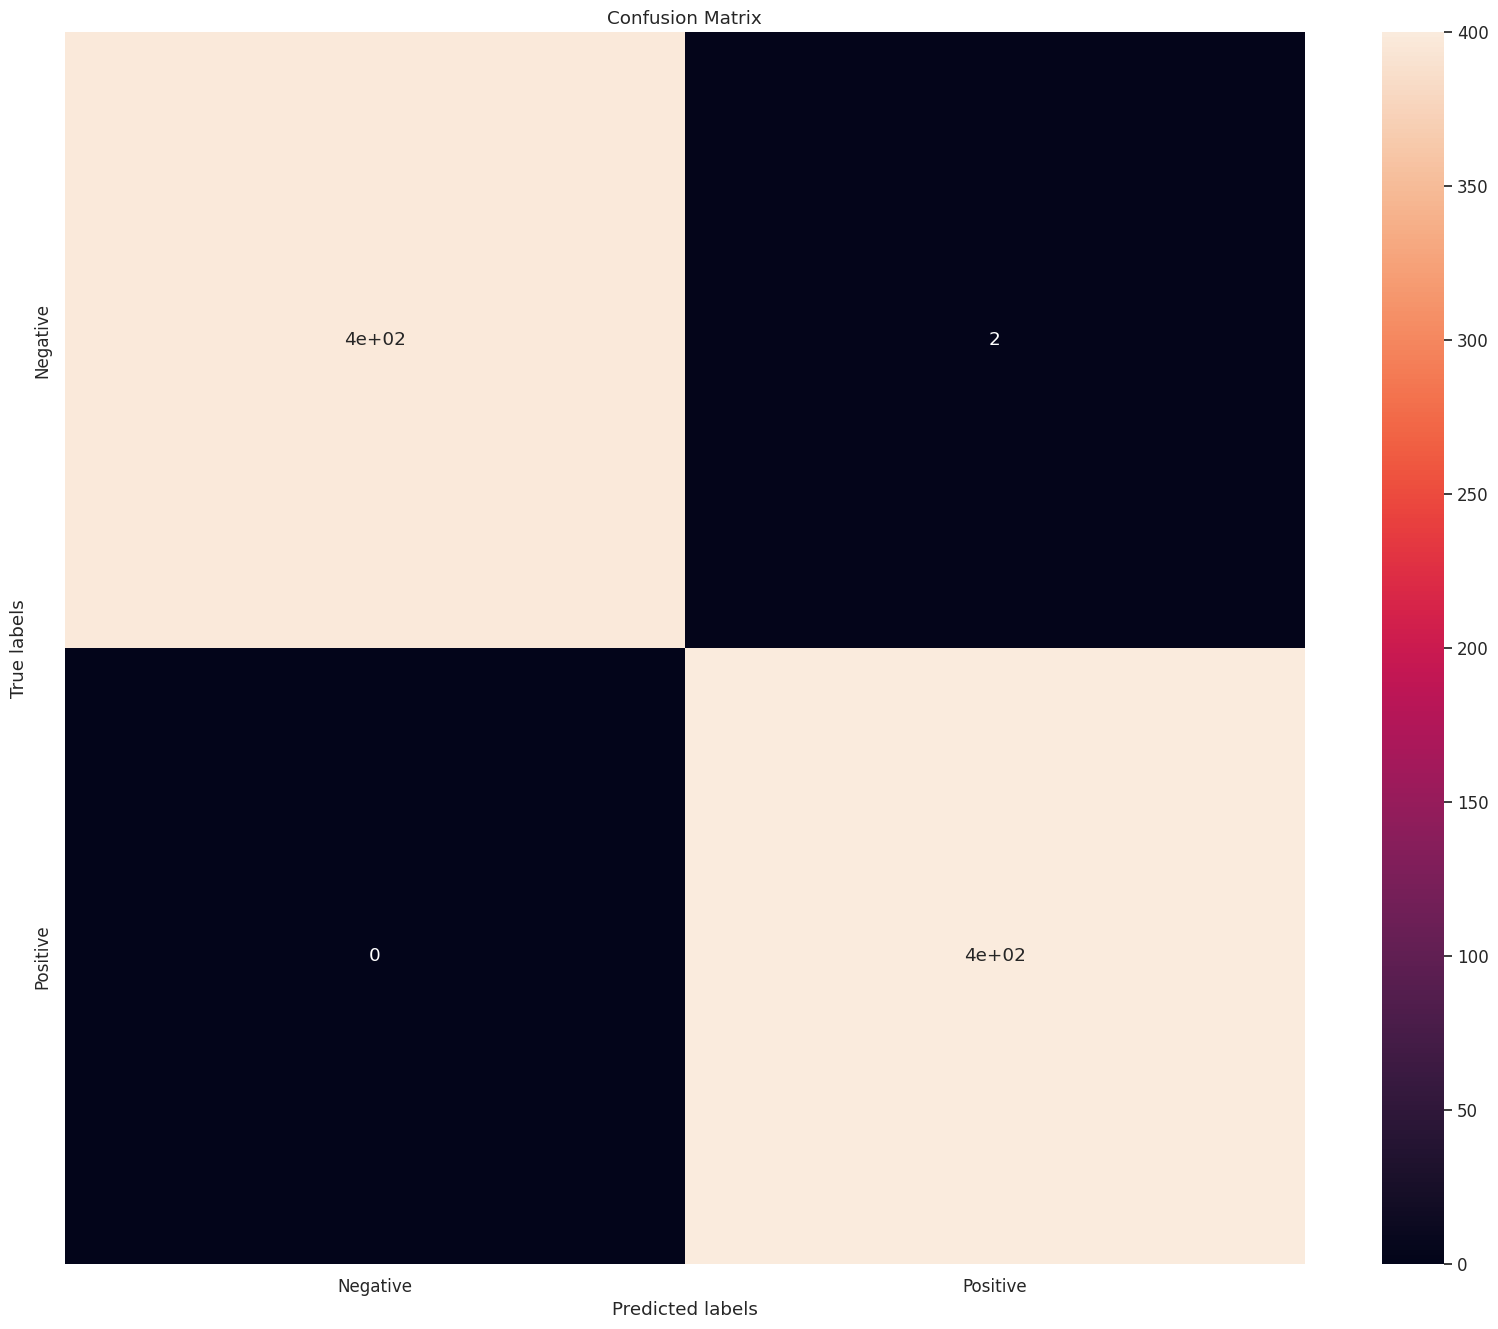

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

accuracy is 0.8
accuracy score for alpha-0.0 is : 80.0%


In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

0.7999199679871949
accuracy score for alpha-0.0 is : 80.0%


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)
print("accuracy score for alpha-{} is : {}%".format(round (i,1), round (score *100, 2)))

scikit score: 0.8
accuracy score for alpha-0.0 is : 80.0%


In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.8

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.80       100\n           1       0.81      0.78      0.80       100\n\n    accuracy                           0.80       200\n   macro avg       0.80      0.80      0.80       200\nweighted avg       0.80      0.80      0.80       200\n'

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[82, 18],
       [22, 78]])

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
3,Naive Bayes,0.820
1,Logistic Regression,0.800
4,Stochastic Gradient Decent,0.800
6,CatBoost,0.790
0,Support Vector Machines,0.785
2,Random Forest,0.760
5,XGBoost,0.755


# result
For multiclass classification, the best model for this dataset would be Naive Bayes

For binary classification, the best model for this dataset would be Naive Bayes	 Descent.